C:\Users\cunn2\AppData\Local\Temp\ipykernel_11368\513011270.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(r"C:\Users\cunn2\OneDrive\DSML\Project\thes

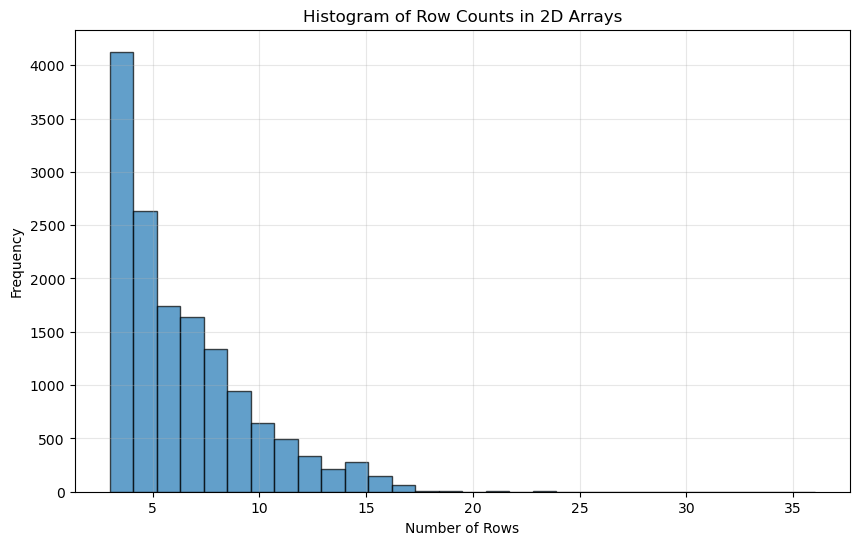

In [2]:
import torch
import matplotlib.pyplot as plt

data = torch.load(r"C:\Users\cunn2\OneDrive\DSML\Project\thesis-repo\data\exp1\train_data.pt")

# Extract the number of rows from each 2D array
row_counts = [arr.shape[0] for arr in data]

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(row_counts, bins=30, edgecolor='black', alpha=0.7)
plt.title('Histogram of Row Counts in 2D Arrays')
plt.xlabel('Number of Rows')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.show()


In [1]:
import os
import sys
import time
import logging
import datetime
import glob
import random
import argparse
from typing import List, Dict

os.chdir(r"C:\Users\cunn2\OneDrive\DSML\Project\thesis-repo")

import numpy as np
import torch
from functools import partial
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

from sms.exp1.data.formatter import InputFormatter
from sms.src.synthetic_data.note_arr_mod import NoteArrayModifier

In [3]:
d = {'a': 'b'}
d.a

AttributeError: 'dict' object has no attribute 'a'

In [2]:
import yaml
from pathlib import Path
import re
from sms.exp1.config_classes import load_config_from_launchplan

config = load_config_from_launchplan(r"C:\Users\cunn2\OneDrive\DSML\Project\thesis-repo\sms\exp1\launchplans\01.yaml")




{'input': 'C:/Users/cunn2/OneDrive/DSML/Project/thesis-repo/sms/exp1/configs/inp/pr_32.yaml', 'pt_dl': 'C:/Users/cunn2/OneDrive/DSML/Project/thesis-repo/sms/exp1/configs/dl/nonseq_standard.yaml', 'ft_dl': 'C:/Users/cunn2/OneDrive/DSML/Project/thesis-repo/sms/exp1/configs/dl/nonseq_standard.yaml', 'encoder': 'C:/Users/cunn2/OneDrive/DSML/Project/thesis-repo/sms/exp1/configs/enc/conv_pr.yaml', 'projector': 'C:/Users/cunn2/OneDrive/DSML/Project/thesis-repo/sms/exp1/configs/proj/proj.yaml', 'pt_loss': {'type': 'vicreg_loss', 'params': {'weight_inv': 25, 'weight_var': 25, 'weight_cov': 1}}, 'ft_loss': {'type': 'contrastive_loss', 'params': {'temperature': 0.1}}, 'dims': {'input_shape': [128, 32], 'd_latent': 64, 'd_projected': 64}, 'pt_optimizer': {'type': 'adam', 'params': {'lr': 0.001}}, 'ft_optimizer': {'type': 'adam', 'params': {'lr': 0.001}}, 'pt_scheduler': {'type': 'step', 'params': {'step_size': 10, 'gamma': 0.1}}, 'ft_scheduler': {'type': 'step', 'params': {'step_size': 10, 'gamma'

In [ ]:
"C:\Users\cunn2\OneDrive\DSML\Project\thesis-repo\sms\exp1\launchplans\01.yaml".replace('\\', '/')


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (3907113450.py, line 1)

In [ ]:
dict1 = torch.load(r"C:\Users\cunn2\OneDrive\DSML\Project\thesis-repo\data\exp1\mtc_one_bar_segments_nr.pt")
dict2 = torch.load(r"C:\Users\cunn2\OneDrive\DSML\Project\thesis-repo\data\exp1\maestro_one_bar_segments_nr.pt")
vecs = list(dict1.values()) + list(dict2.values())


C:\Users\cunn2\AppData\Local\Temp\ipykernel_262260\2244089641.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dict1 = torch.load(r"C:\Users\cunn2\OneDrive\DSML\Project\t

In [ ]:
v = vecs[0]
np.cumsum(v[:, 0])

array([0.3, 0.8, 1.3, 1.8, 2.3, 2.8, 4. ])

# taking the 1-norm of the difference between relative pitch quantized vectors achieves a decent seperation between the positive and negative examples


[2024-09-25 12:11:08] [INFO ] Shifting note at index 0 by -3 semitones.
[2024-09-25 12:11:08] [INFO ] Shifting note at index 1 by -3 semitones.
[2024-09-25 12:11:08] [INFO ] Shifting note at index 3 by 4 semitones.
[2024-09-25 12:11:08] [INFO ] Shifting note at index 2 by 4 semitones.
[2024-09-25 12:11:08] [INFO ] Shifting note at index 2 by 3 semitones.
[2024-09-25 12:11:08] [INFO ] Shifting note at index 1 by -2 semitones.
[2024-09-25 12:11:08] [INFO ] Shifting note at index 0 by -5 semitones.
[2024-09-25 12:11:08] [INFO ] Shifting note at index 3 by 5 semitones.
[2024-09-25 12:11:08] [INFO ] Shifting note at index 0 by 6 semitones.
[2024-09-25 12:11:08] [INFO ] Shifting note at index 1 by -8 semitones.
[2024-09-25 12:11:08] [INFO ] Shifting note at index 8 by -2 semitones.
[2024-09-25 12:11:08] [INFO ] Shifting note at index 2 by -8 semitones.
[2024-09-25 12:11:08] [INFO ] Shifting note at index 1 by -7 semitones.
[2024-09-25 12:11:08] [INFO ] Shifting note at index 3 by 7 semitones

[np.float64(21.0), np.float64(24.0), np.float64(68.0), np.float64(80.0), np.float64(24.0), np.float64(12.0), np.float64(10.0), np.float64(40.0), np.float64(42.0), np.float64(64.0), np.float64(8.0), np.float64(16.0), np.float64(14.0), np.float64(28.0), np.float64(88.0), np.float64(24.0), np.float64(0.0), np.float64(12.0), np.float64(20.0), np.float64(24.0), np.float64(56.0), np.float64(56.0), np.float64(72.0), np.float64(15.0), np.float64(120.0), np.float64(6.0), np.float64(56.0), np.float64(40.0), np.float64(32.0), np.float64(16.0), np.float64(6.0), np.float64(40.0), np.float64(28.0), np.float64(8.0), np.float64(91.0), np.float64(28.0), np.float64(16.0), np.float64(8.0), np.float64(32.0), np.float64(7.0), np.float64(32.0), np.float64(6.0), np.float64(32.0), np.float64(6.0), np.float64(24.0), np.float64(24.0), np.float64(8.0), np.float64(192.0), np.float64(18.0), np.float64(56.0), np.float64(4.0), np.float64(35.0), np.float64(192.0), np.float64(24.0), np.float64(28.0), np.float64(48.0),

[2024-09-25 12:11:24] [DEBUG] CONFIGDIR=C:\Users\cunn2\.matplotlib
[2024-09-25 12:11:24] [DEBUG] interactive is False
[2024-09-25 12:11:24] [DEBUG] platform is win32
[2024-09-25 12:11:24] [DEBUG] CACHEDIR=C:\Users\cunn2\.matplotlib
[2024-09-25 12:11:24] [DEBUG] Using fontManager instance from C:\Users\cunn2\.matplotlib\fontlist-v390.json
[2024-09-25 12:11:25] [DEBUG] Loaded backend module://matplotlib_inline.backend_inline version unknown.
[2024-09-25 12:11:25] [DEBUG] Loaded backend module://matplotlib_inline.backend_inline version unknown.
[2024-09-25 12:11:25] [DEBUG] findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
[2024-09-25 12:11:25] [DEBUG] findfont: score(FontEntry(fname='c:\\Users\\cunn2\\miniconda3\\envs\\sms\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXNonUni.ttf', name='STIXNonUnicode', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
[2024-09-25 12:11:25] [DEBUG] findf

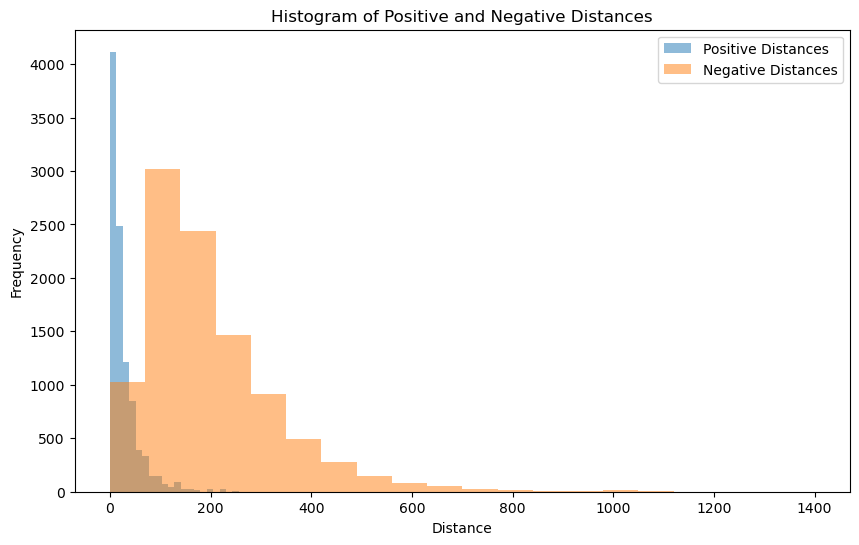

Average positive distance: 26.4923
Average negative distance: 196.1627


In [ ]:
formatter = InputFormatter(make_relative_pitch=False, quantize=True)
modifier = NoteArrayModifier()
aug_config = {
    'use_transposition': False,
    'use_shift_selected_notes_pitch': True,
    'use_change_note_durations': False,
    'use_delete_notes': False,
    'use_insert_notes': False
}

positive_distances = []
negative_distances = []

for i in range(10000):
    random_idx = np.random.randint(0, len(vecs))
    anchor = vecs[random_idx]
    anchor_augmented = modifier(anchor, aug_config)
    
    anchor = formatter(anchor)
    anchor_augmented = formatter(anchor_augmented)

    new_idx = random_idx
    while new_idx == random_idx:
        new_idx = np.random.randint(0, len(vecs))

    negative = vecs[new_idx]
    negative = formatter(negative)

    positive_distances.append(np.linalg.norm(anchor - anchor_augmented, ord=1))
    negative_distances.append(np.linalg.norm(anchor - negative, ord=1))

print(positive_distances)
print(negative_distances)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(positive_distances, bins=20, alpha=0.5, label='Positive Distances')
plt.hist(negative_distances, bins=20, alpha=0.5, label='Negative Distances')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Histogram of Positive and Negative Distances')
plt.legend()
plt.show()

print(f"Average positive distance: {np.mean(positive_distances):.4f}")
print(f"Average negative distance: {np.mean(negative_distances):.4f}")




In [ ]:
import torch

data = torch.load(r"C:\Users\cunn2\OneDrive\DSML\Project\thesis-repo\data\exp1\train_data.pt")


C:\Users\cunn2\AppData\Local\Temp\ipykernel_262260\3303248448.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(r"C:\Users\cunn2\OneDrive\DSML\Project\th